In [1]:
!git clone https://github.com/ultralytics/yolov5.git  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.10 MiB | 4.35 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.
/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5


In [2]:
pwd

'/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5'

In [3]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch
from IPython.display import Image, clear_output  # to display images
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.2.2 CPU


In [4]:
cd /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5

/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5


In [5]:
ls

CITATION.cff      benchmarks.py     hubconf.py        train.py
CONTRIBUTING.md   classify/         models/           tutorial.ipynb
LICENSE           data/             pyproject.toml    utils/
README.md         detect.py         requirements.txt  val.py
README.zh-CN.md   export.py         segment/


In [6]:
rm -rf /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5/__MACOSX


# New Section

In [7]:
!pwd

/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5


In [11]:
%cat /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 6
names: ['chaien', 'doremon', 'nobita', 'xeko', 'xuka','Shin-Chan']

roboflow:
  workspace: hello-jwlr9
  project: task_label2train
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/hello-jwlr9/task_label2train/dataset/1

In [12]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [18]:
%%writetemplate /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/data.yaml

train: /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/train/images
val: /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/valid/images
test: /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/test/images

nc: 6
names: ['chaien', 'doremon', 'nobita', 'xeko', 'xuka','Shin-Chan']


roboflow:
  workspace: paige-reed-ikrfu
  project: tom_jerry_1
  version: 1
  license: Public Domain
  url: https://universe.roboflow.com/paige-reed-ikrfu/tom_jerry_1/dataset/1

In [19]:
%cat /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/data.yaml



train: /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/train/images
val: /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/valid/images
test: /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/test/images

nc: 6
names: ['chaien', 'doremon', 'nobita', 'xeko', 'xuka','Shin-Chan']


roboflow:
  workspace: paige-reed-ikrfu
  project: tom_jerry_1
  version: 1
  license: Public Domain
  url: https://universe.roboflow.com/paige-reed-ikrfu/tom_jerry_1/dataset/1


In [20]:
# define number of classes based on YAML
import yaml
with open("/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [21]:
num_classes

'6'

In [29]:
%cat /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5/models/yolov5s.yaml


# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 

In [30]:
%%writetemplate /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5/models/yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [31]:
%cat /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5/models/yolov5s.yaml



# parameters
nc: 6  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-

In [36]:
%cat /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5/train.py


# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license
"""
Train a YOLOv5 model on a custom dataset. Models and datasets download automatically from the latest YOLOv5 release.

Usage - Single-GPU training:
    $ python train.py --data coco128.yaml --weights yolov5s.pt --img 640  # from pretrained (recommended)
    $ python train.py --data coco128.yaml --weights '' --cfg yolov5s.yaml --img 640  # from scratch

Usage - Multi-GPU DDP training:
    $ python -m torch.distributed.run --nproc_per_node 4 --master_port 1 train.py --data coco128.yaml --weights yolov5s.pt --img 640 --device 0,1,2,3

Models:     https://github.com/ultralytics/yolov5/tree/master/models
Datasets:   https://github.com/ultralytics/yolov5/tree/master/data
Tutorial:   https://docs.ultralytics.com/yolov5/tutorials/train_custom_data
"""

import argparse
import math
import os
import random
import subprocess
import sys
import time
from copy import deepcopy
from datetime import datetime, timedelta
from pathlib im

In [37]:
%%time
#%cd /content/yolov5/
#!python train.py --img 640 --batch 16 --epochs 50 --data '/content/yolov5/Toons_Dataset_YOLO_V5/data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results  --cache
%cd /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5

# Disable Weights & Biases logging
import os
os.environ["WANDB_DISABLED"] = "true"

# Run training
!python train.py --img 640 --batch 4 --epochs 50 --data '/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/data.yaml' --cfg models/yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results --cache


/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.12.7 torch-2.6.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weig

                 Class     Images  Instances          P          R      mAP50   
                   all         35         64      0.871     0.0625     0.0495     0.0124

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       9/49         0G    0.06111    0.04648    0.04274         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         64      0.902     0.0694     0.0746     0.0297

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      10/49         0G    0.05849    0.04639    0.04038         11        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         64      0.938      0.104      0.146     0.0482

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      11/49         0G     0.0565    0.04626    0.03883         10        640: 1
          

      33/49         0G    0.04589     0.0403    0.03067          9        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         64      0.291      0.413      0.371       0.15

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      34/49         0G    0.04528    0.03996    0.03061          8        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         64      0.367      0.511      0.486      0.196

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      35/49         0G     0.0437      0.041    0.02978         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         35         64      0.637      0.437      0.531      0.222

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      36/4

In [38]:
%ls runs/

train/


In [40]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [41]:
pwd

'/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5'

In [45]:
#when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.5 --source /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/test/images


detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.12.7 torch-2.6.0 CPU

Fusing layers... 
YOLOv5s summary: 182 layers, 7260003 parameters, 0 gradients
image 1/23 /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/test/images/10152f89ec18d8ae02eae58bb3c4c6a7ceb2f1c113df1e5a755d119a4789eba1_jpg.rf.8abe23219153551076b4d5c3d8677ae1.jpg: 384x640 1 Shin-Chan, 60.6ms
image 2/23 /Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/Cartoon_v5/t

In [60]:
cd ..

/Users/venkat/Desktop/DeeP_Learning/Toons/yolov5


In [46]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp4.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")


GROUND TRUTH AUGMENTED TRAINING DATA:


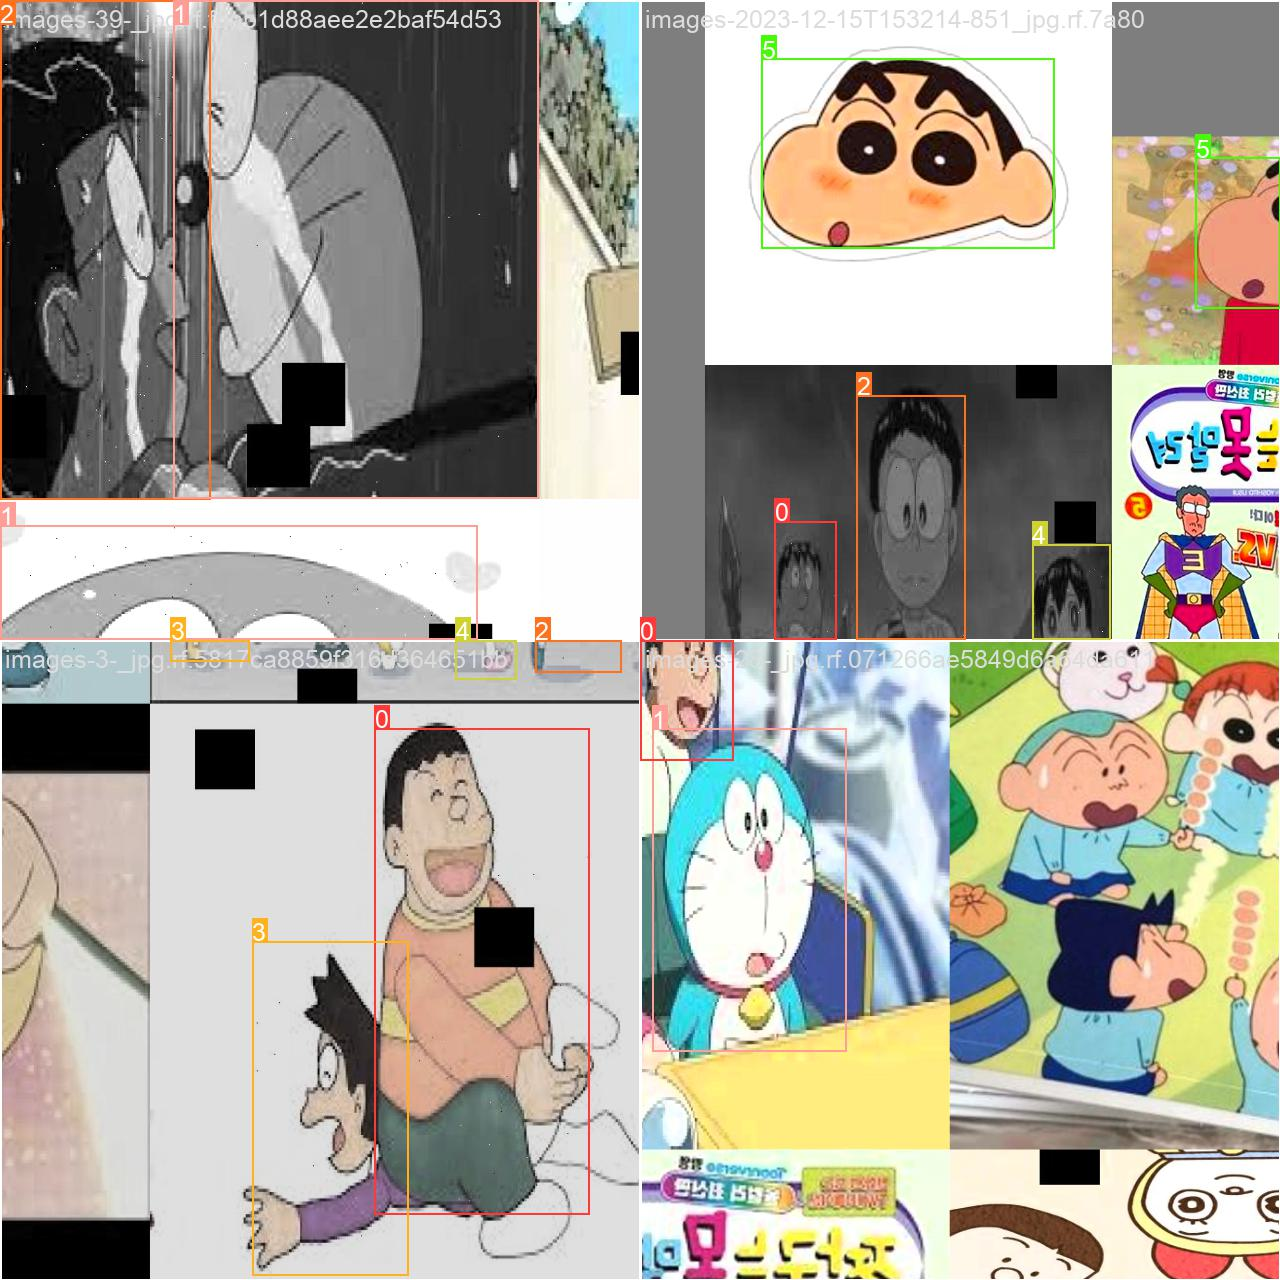

In [47]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='runs/train/yolov5s_results/train_batch0.jpg', width=900)

GROUND TRUTH TRAINING DATA:


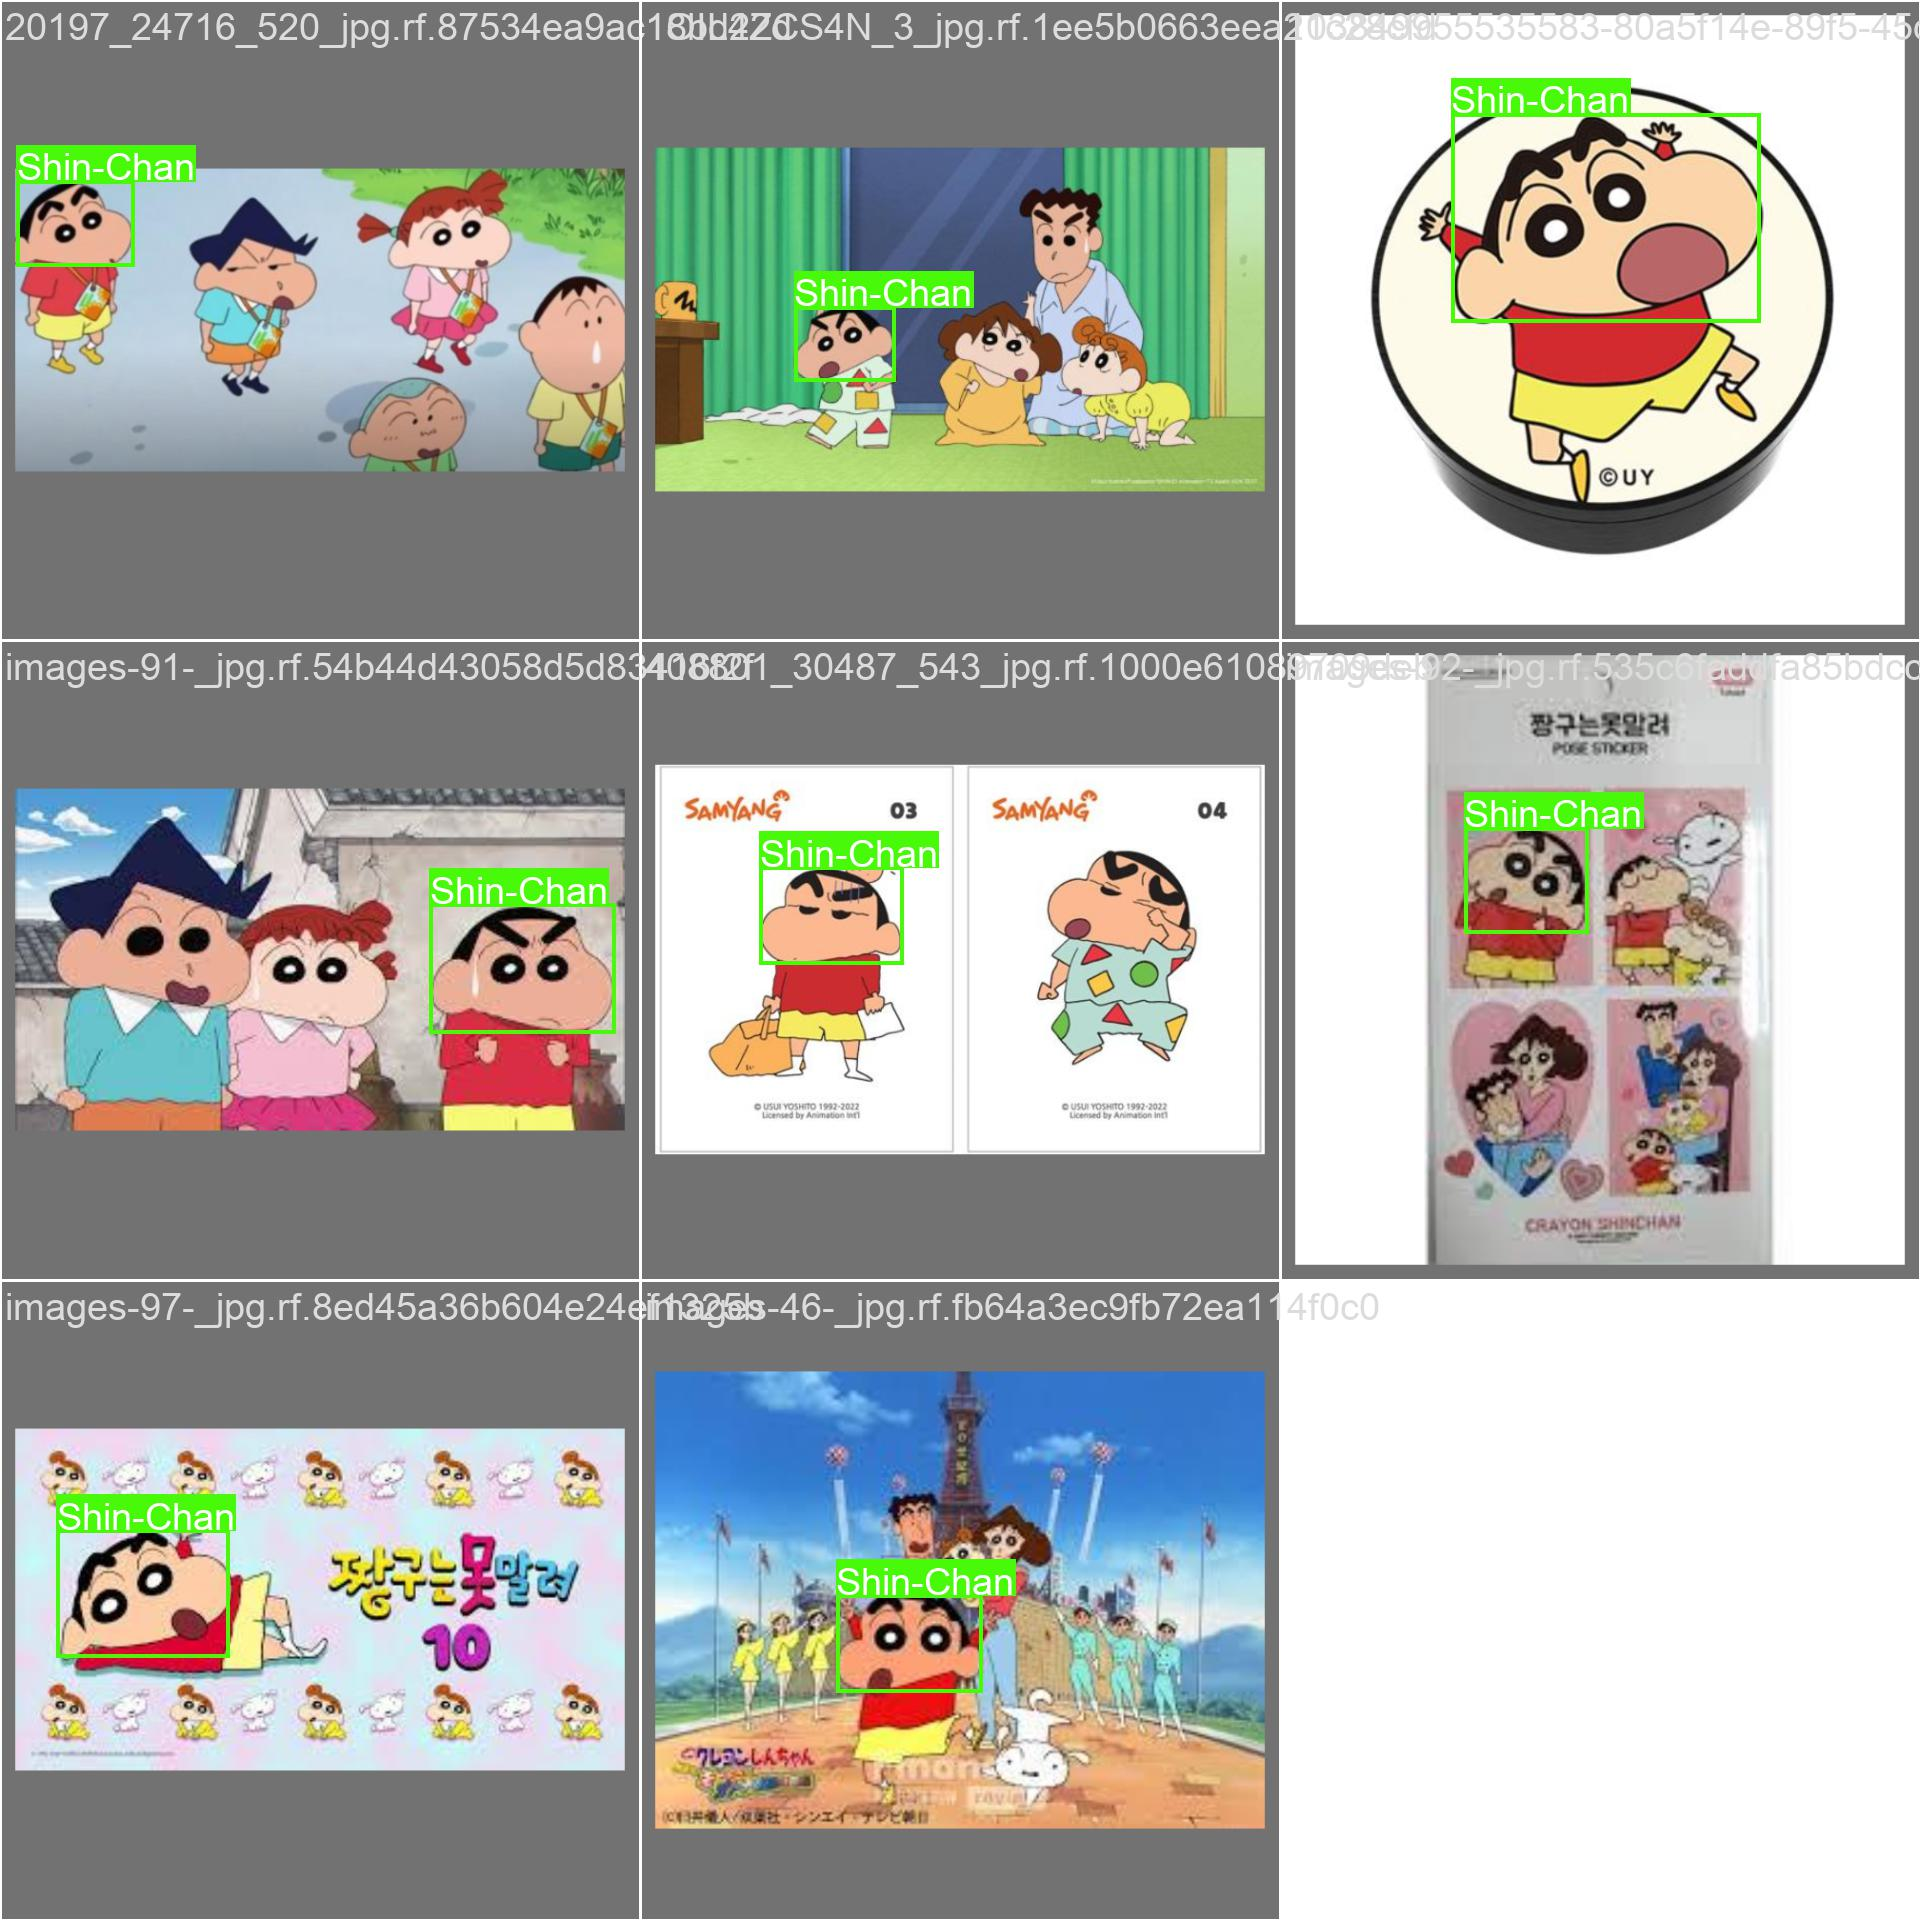

In [50]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

/Users/venkat/anaconda3/envs/WIRED/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


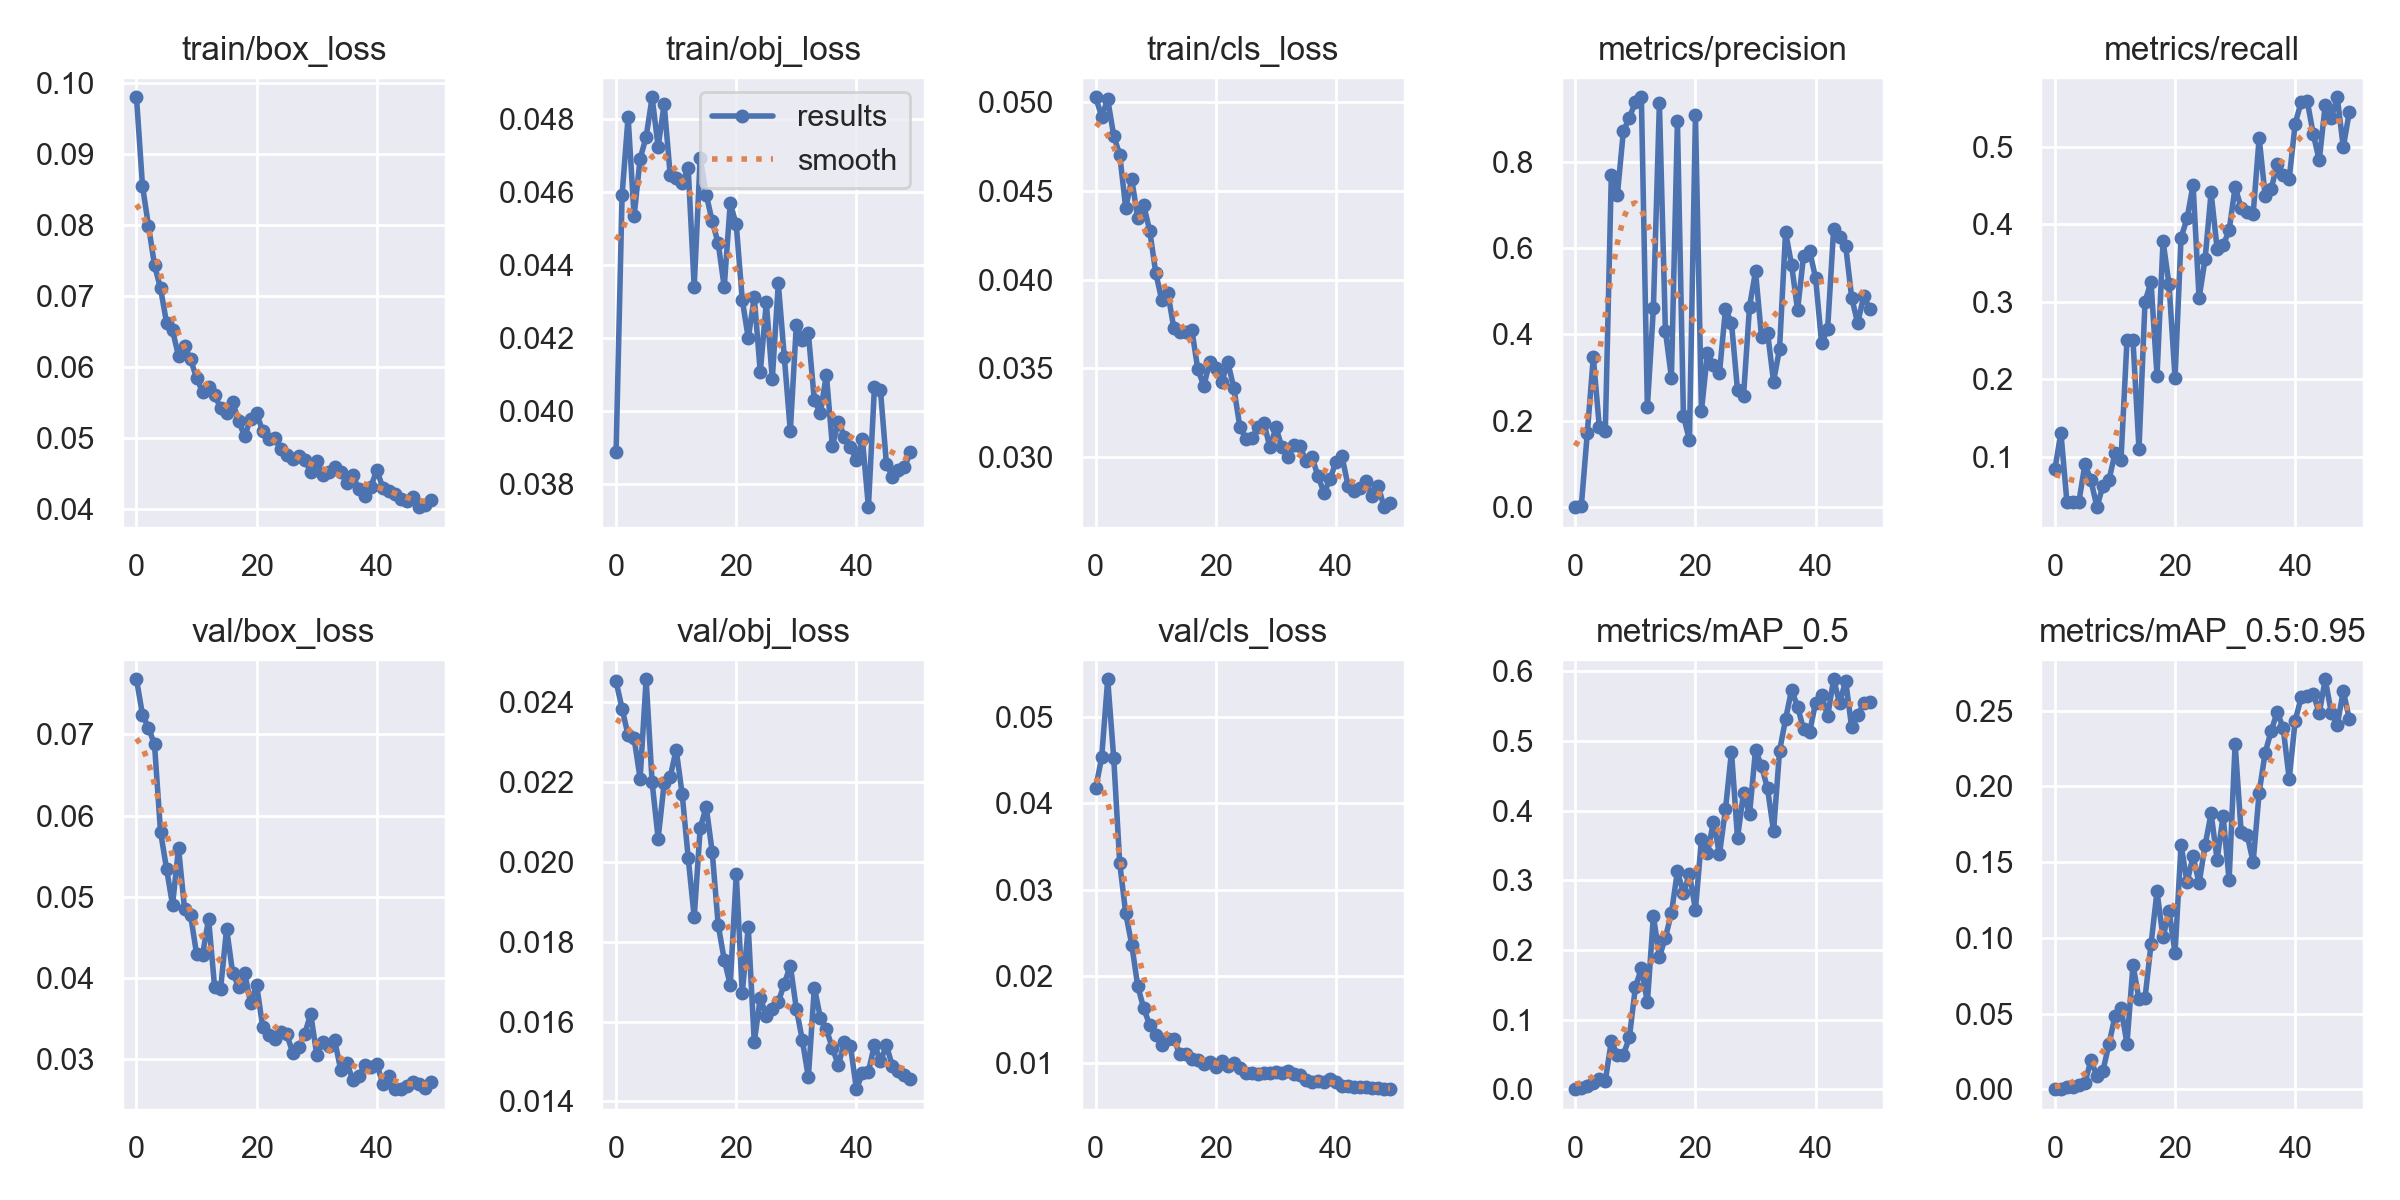

In [49]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='runs/train/yolov5s_results/results.png', width=1000)  # view results.png

In [51]:
pwd

'/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5'

In [52]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/Users/venkat/Desktop/Cartoon_DS/Dataset_YOLO_V5/yolov5/runs/detect/exp*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")
    
    